**Assignment Lab 2**


**CIFAR IMAGE CLASSIFICATION using CNN**

*   List item
*   List item



In [39]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from tensorflow.keras.datasets import mnist

from tensorflow import keras
import tensorflow.compat.v2 as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical as tcg


**Import Data**

I use CIFAR dataset which comes with keras. It has 50,000 training images and 10000 test images. And there are 10 classes like airplane, bird, dog, cat, frog, horse, ship and truck.

In [3]:
from keras.datasets import cifar10
(train_images, train_labels),(test_images, test_labels) = cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


Explore the data

In [4]:
from keras.utils import to_categorical
print('Training data shape : ', train_images.shape, train_labels.shape)
print('Testing data shape : ', test_images.shape, test_labels.shape)


Training data shape :  (50000, 32, 32, 3) (50000, 1)
Testing data shape :  (10000, 32, 32, 3) (10000, 1)


Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth : [3]')

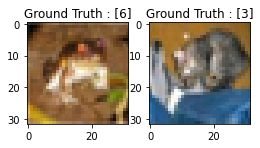

In [5]:
#Find the unique numbers from the train labels
classes = np.unique(train_labels)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

plt.figure(figsize=[4,2])
#Display the first image in training data
plt.subplot(121)
plt.imshow(train_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_labels[0]))

#Display the first image in test data
plt.subplot(122)
plt.imshow(test_images[0,:,:],cmap='gray')
plt.title("Ground Truth : {}".format(test_labels[0]))


Preprocess the Data

perform nornalization on data and convert the labels to categorical variables to be used in keras.
here find the shape of input images and create the variable input shape

In [6]:
nRows, nCols, nDims = train_images.shape[1:]
train_data = train_images.reshape(train_images.shape[0], nRows, nCols, nDims)
test_data = test_images.reshape(test_images.shape[0],nRows,nCols,nDims)
input_shape = (nRows, nRows, nDims)

#Change to float data type
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

# Scale the data to lie between 0 to 1
train_data /=255
test_data /= 255

# Change the labels from integer to categorical data
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

#Display the change in the label
print('Original Label 0 :', train_labels[0])
print('After conversion to one hot : ', train_labels_one_hot[0])

Original Label 0 : [6]
After conversion to one hot :  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


Define the Model 

Create the model with CONV layer, max pooling layer, droupout layer and dense layer

In [16]:
def createModel():
    model = Sequential()
    # The first 2 layers with 32 filters of window size 3x3
    model.add(Conv2D(32,(3,3),padding = 'same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(32,(3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(64,(3,3),padding = 'same', activation='relu'))
    model.add(Conv2D(64,(3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(64,(3,3),padding = 'same', activation='relu'))
    model.add(Conv2D(64,(3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5)) #You can play around with this and check the effect of Dropout
    model.add(Dense(nClasses,activation='softmax'))
    
    return model

Train the Model 

In [9]:

model1 = createModel()
batch_size = 256
epochs = 10
model1.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])

model1.summary()

history = model1.fit(train_data, train_labels_one_hot, batch_size=batch_size, epochs = epochs, verbose = 1, validation_data = (test_data,test_labels_one_hot))
model1.evaluate(test_data, test_labels_one_hot)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0

[0.985090434551239, 0.6585999727249146]

Check loss and accuracy curve

Text(0.5, 1.0, 'Loss Curves')

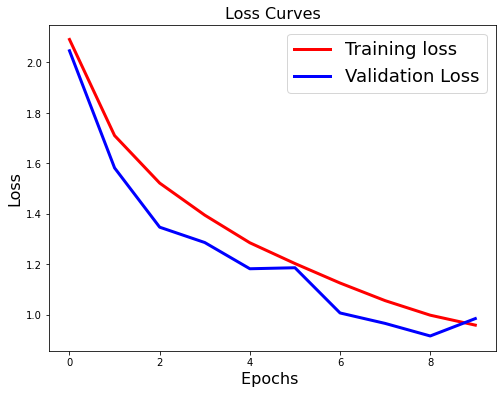

In [13]:
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

Text(0.5, 1.0, 'Accuracy Curves')

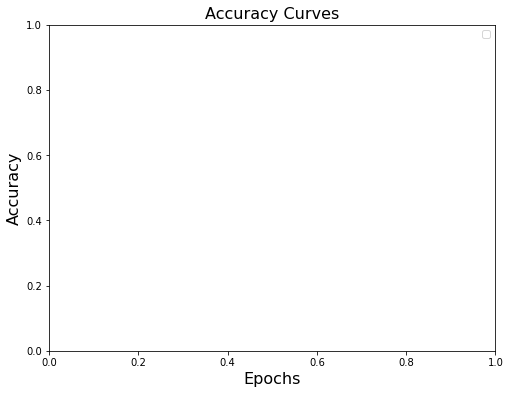

In [33]:
plt.figure(figsize=[8,6])
#plt.plot(history.history['accuracy'],'r',linewidth=3.0)
#plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.xlabel('Epochs',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves', fontsize=16)

Save the Model

In [26]:
model1.save('cifar.h5')

Load the Model

In [47]:
from tensorflow.keras.models import load_model
model1.load_weights("cifar.h5")
loaded_model1 = tf.keras.models.load_model("cifar.h5")

loaded_model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0